Step 1: Data Collection and Preprocesseing

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
print(df.head())
df.info()
# Check for missing values
print(df.isnull().sum())

# Separate features & target
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target (0 = Normal, 1 = Fraud)

Mounted at /content/drive
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

      

Step 2: Understanding the Data

In [ ]:
# Calculate Fraud Percentage
fraud_cases = df['Class'].value_counts()[1]
total_cases = len(df)

fraud_percentage = (fraud_cases / total_cases) * 100

print(f"Fraud Cases: {fraud_cases}")
print(f"Total Transactions: {total_cases}")
print(f"Fraud Case Percentage: {fraud_percentage:.4f}%")

Fraud Cases: 492
Total Transactions: 284807
Fraud Case Percentage: 0.1727%


Step 3: Visualization of Data


<ipython-input-3-2092161325>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Class'], palette=['blue', 'red'])


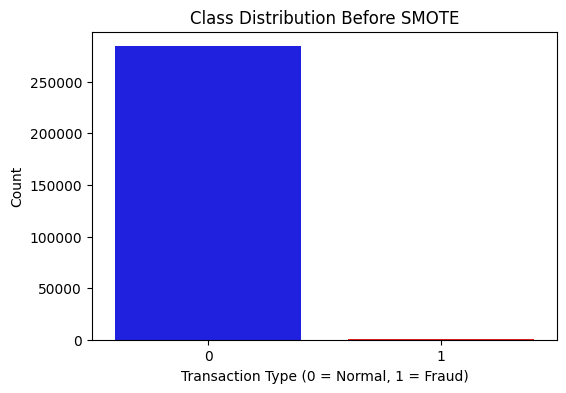

Class Distribution Before SMOTE:
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Class Distribution Before SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=df['Class'], palette=['blue', 'red'])
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Transaction Type (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# Print class distribution
print("Class Distribution:")
print(df['Class'].value_counts())


Step 4: Balancing the Dataset

<ipython-input-4-693055796>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette=['blue', 'red'])


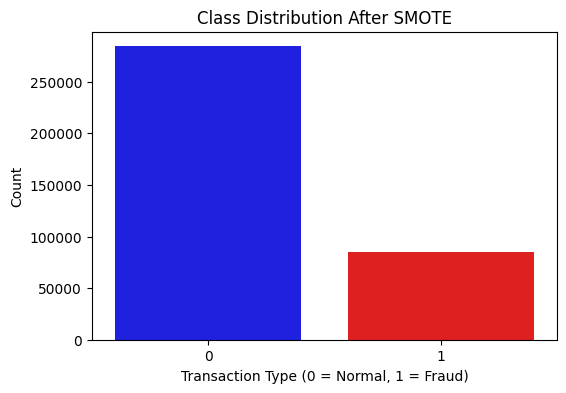

Class Distribution After SMOTE:
Class
0    284315
1     85294
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE - Increase fraud cases to 30% of normal cases
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Visualizing Class Distribution After SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled, palette=['blue', 'red'])
plt.title("Class Distribution After SMOTE")
plt.xlabel("Transaction Type (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# Print new class distribution
print("Class Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())

from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42) # Added this line

Step 5: Building Models on Balanced Dataset


1. Logistic Regression
2. KNN
3. Random Forest
4. XGBoost
5. Hybrid Model

LOGISTIC REGRESSION

Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56912
           1       0.96      0.97      0.96     17010

    accuracy                           0.98     73922
   macro avg       0.98      0.98      0.98     73922
weighted avg       0.98      0.98      0.98     73922



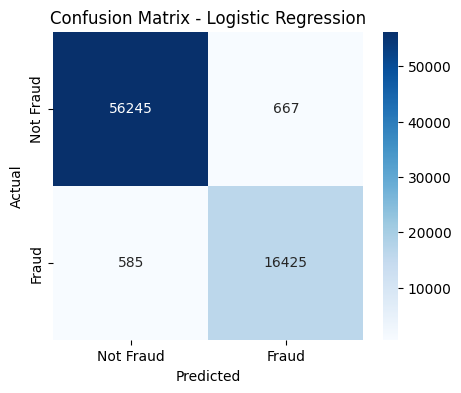

ROC-AUC Score: 0.9966


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns


# Train Logistic Regression Model
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Predict
y_pred_log = log_reg.predict(X_test)

# Evaluate
print("Logistic Regression Performance")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {auc_score:.4f}")


KNN

K-Nearest Neighbors Performance
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     56912
           1       0.92      0.90      0.91     17010

    accuracy                           0.96     73922
   macro avg       0.94      0.94      0.94     73922
weighted avg       0.96      0.96      0.96     73922



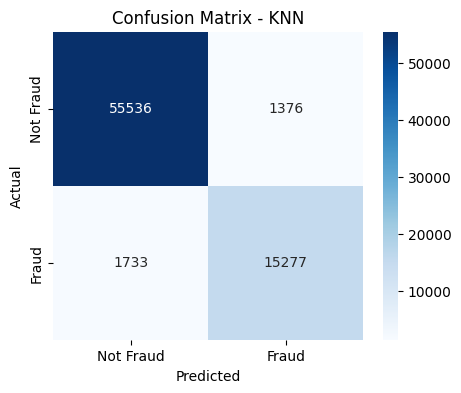

ROC-AUC Score: 0.9807


In [ ]:
# Import KNN
from sklearn.neighbors import KNeighborsClassifier

# Train KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("K-Nearest Neighbors Performance")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

# AUC Score
auc_score_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {auc_score_knn:.4f}")


RANDOM FOREST

Random Forest Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56912
           1       1.00      1.00      1.00     17010

    accuracy                           1.00     73922
   macro avg       1.00      1.00      1.00     73922
weighted avg       1.00      1.00      1.00     73922



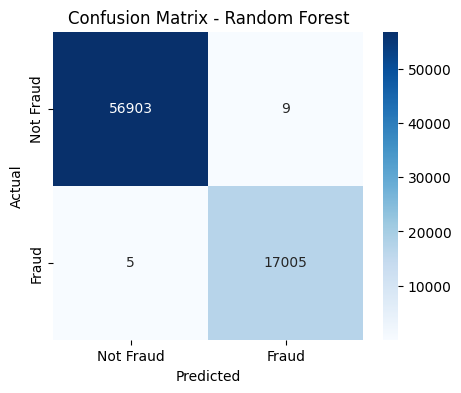

ROC-AUC Score: 1.0000


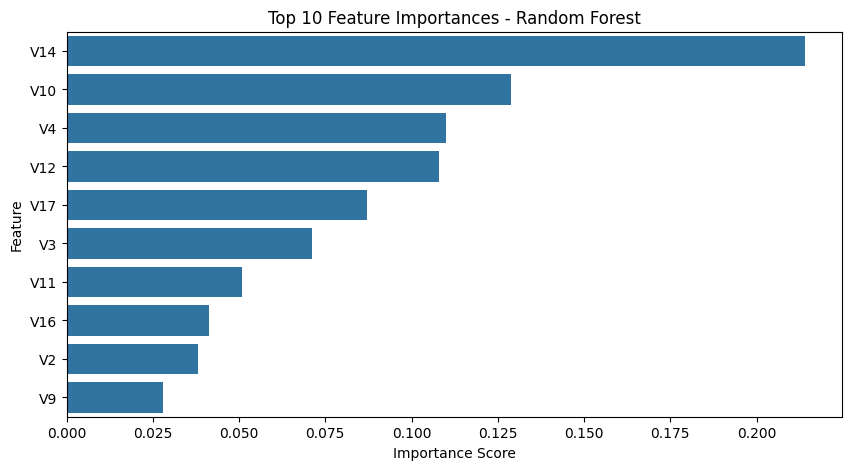

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Performance")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# AUC Score
auc_score_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {auc_score_rf:.4f}")

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56912
           1       1.00      1.00      1.00     17010

    accuracy                           1.00     73922
   macro avg       1.00      1.00      1.00     73922
weighted avg       1.00      1.00      1.00     73922



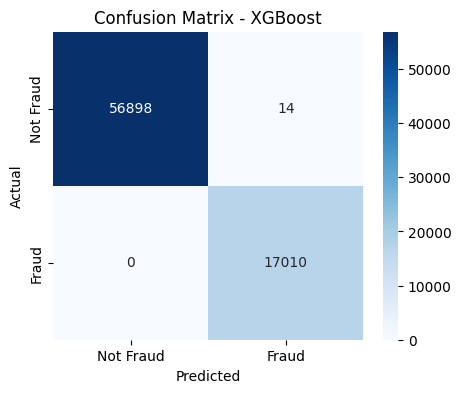

ROC-AUC Score: 1.0000


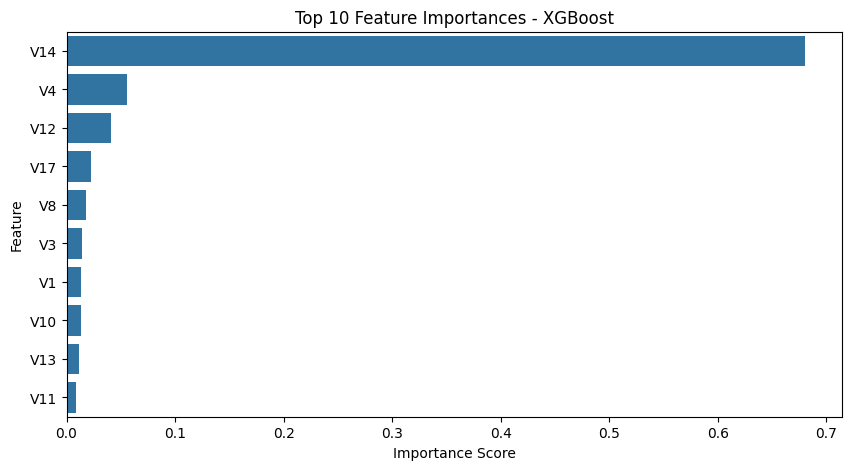

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train XGBoost Model
xgb_model = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Performance")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# AUC Score
auc_score_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {auc_score_xgb:.4f}")

# Feature Importance
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.title("Top 10 Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


HYBRID IMPLEMENTATION

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:01:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:24:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:24:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:24:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:24:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Classifier (Hybrid Model) Performance
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56912
           1       0.95      0.97      0.96     17010

    accuracy                           0.98     73922
   macro avg       0.97      0.98      0.97     73922
weighted avg       0.98      0.98      0.98     73922



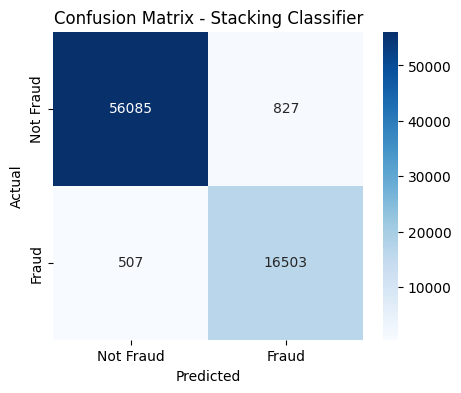

ROC-AUC Score: 0.9966


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define base models (Random Forest & XGBoost)
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), use_label_encoder=False, eval_metric="logloss", random_state=42))
]

# Define meta-model (Logistic Regression)
meta_model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

# Create Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True)
stacking_model.fit(X_train, y_train)

# Predict
y_pred_stack = stacking_model.predict(X_test)

# Evaluate
print("Stacking Classifier (Hybrid Model) Performance")
print(classification_report(y_test, y_pred_stack))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_stack), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()

# AUC Score
auc_score_stack = roc_auc_score(y_test, stacking_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {auc_score_stack:.4f}")


Feature Importance for Hybrid Model

<ipython-input-11-3470430862>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stacking_importances[:10], y=stacking_importances.index[:10], palette="Greens_r")


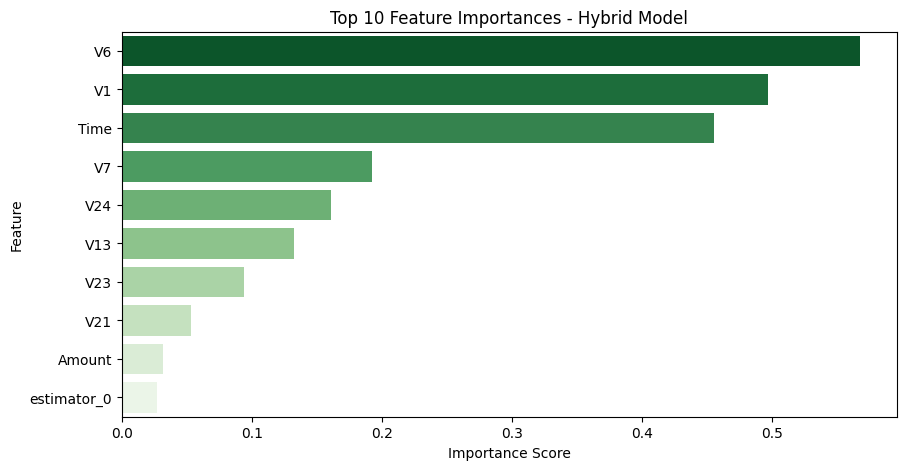

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Feature Importance for Hybrid Model (Stacking)
if hasattr(stacking_model.final_estimator_, "coef_"):  # Ensure model has coefficients
    # Get the feature names used by the meta-model
    # The number of features is increased due to passthrough=True
    num_base_features = len(base_models)
    num_original_features = X_train.shape[1]
    feature_names = list(X_train.columns) + [f'estimator_{i}' for i in range(num_base_features)]
    # The number of coefficients of the meta-model equals the number of features above
    # Create the Series using the corrected feature names
    stacking_importances = pd.Series(stacking_model.final_estimator_.coef_[0], index=feature_names).sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=stacking_importances[:10], y=stacking_importances.index[:10], palette="Greens_r")
    plt.title("Top 10 Feature Importances - Hybrid Model")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()
else:
    print("Feature importance is not available for the Hybrid Model.")

Step 6: Copmare performance


                 Model  ROC-AUC Score
0  Logistic Regression       0.996566
1        Random Forest       0.999987
2              XGBoost       0.999983
3         Hybrid Model       0.996607


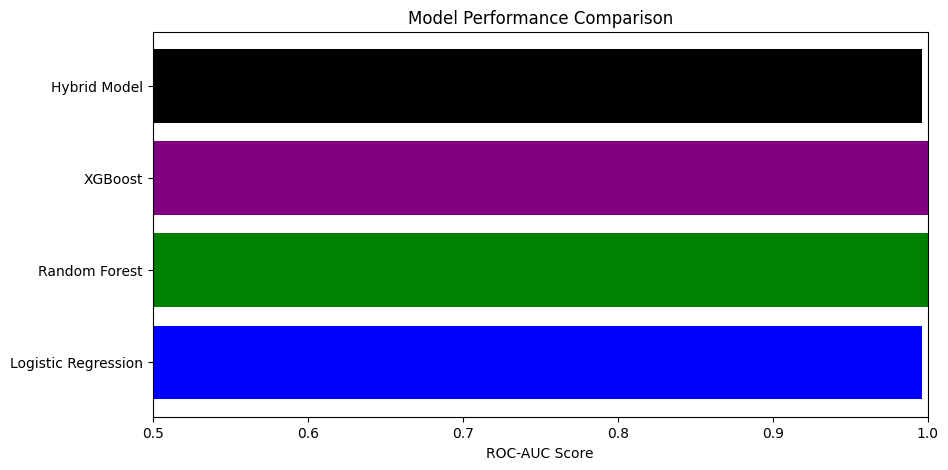

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Store Model Names & Scores
model_performance = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "Hybrid Model"],
    "ROC-AUC Score": [
        roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]),
        auc_score_xgb,  # Calculated in previous steps
        auc_score_stack  # Calculated in previous steps
    ]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display Scores
print(performance_df)

# Plot Performance
plt.figure(figsize=(10, 5))
plt.barh(performance_df["Model"], performance_df["ROC-AUC Score"], color=["blue", "green", "purple", "black"])
plt.xlabel("ROC-AUC Score")
plt.title("Model Performance Comparison")
plt.xlim(0.5, 1)  # AUC scores range from 0.5 (worst) to 1 (best)
plt.show()


XGBoost for IMBALANCED DATA (To suit real world scenario
=

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:33:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost (Imbalanced Data) Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



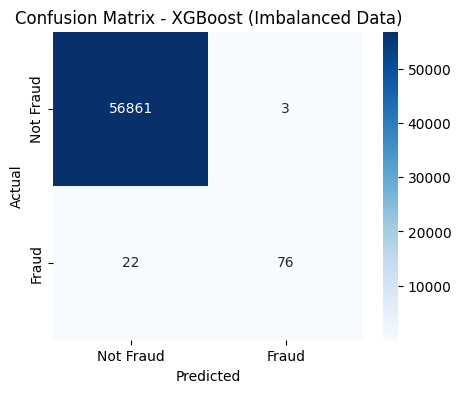

ROC-AUC Score: 0.9811


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train XGBoost without balancing the dataset
xgb_imbalanced = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_imbalanced.fit(X_train, y_train)

# Predict
y_pred_xgb_imbalanced = xgb_imbalanced.predict(X_test)

# Evaluate Performance
print("XGBoost (Imbalanced Data) Performance")
print(classification_report(y_test, y_pred_xgb_imbalanced))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_imbalanced), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost (Imbalanced Data)")
plt.show()

# AUC Score
auc_score_xgb_imbalanced = roc_auc_score(y_test, xgb_imbalanced.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {auc_score_xgb_imbalanced:.4f}")


BALANCED MODEL Vs UNBALANCED MODEL

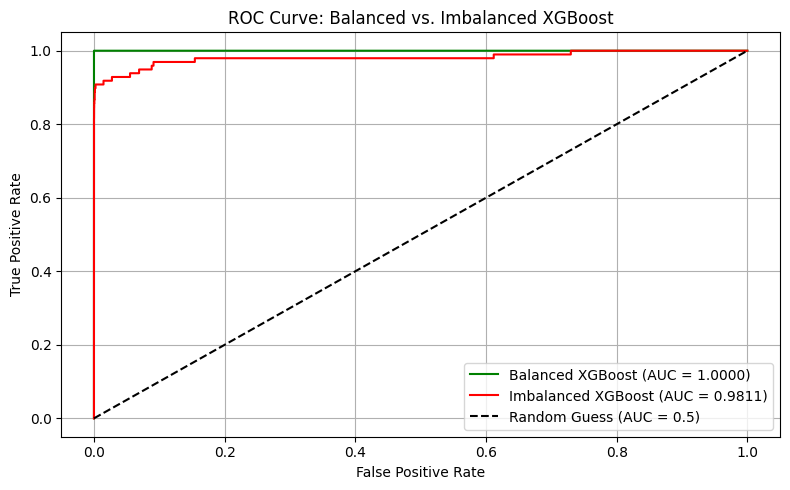

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Balanced XGBoost
fpr_bal, tpr_bal, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_bal = auc(fpr_bal, tpr_bal)

# Imbalanced XGBoost
fpr_imbal, tpr_imbal, _ = roc_curve(y_test, xgb_imbalanced.predict_proba(X_test)[:, 1])
auc_imbal = auc(fpr_imbal, tpr_imbal)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(fpr_bal, tpr_bal, label=f'Balanced XGBoost (AUC = {auc_bal:.4f})', color='green')
plt.plot(fpr_imbal, tpr_imbal, label=f'Imbalanced XGBoost (AUC = {auc_imbal:.4f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')

plt.title('ROC Curve: Balanced vs. Imbalanced XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


ROC-AUC Comparision


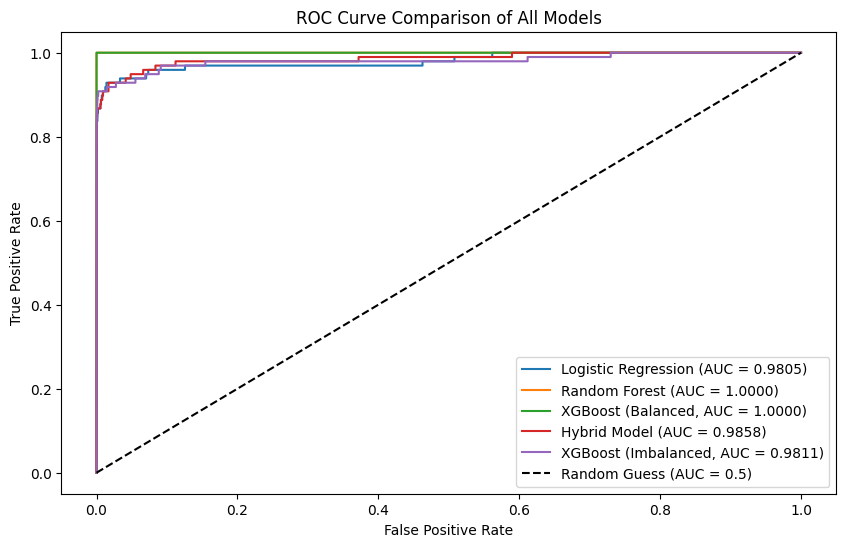

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curves for all models
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
fpr_stack, tpr_stack, _ = roc_curve(y_test, stacking_model.predict_proba(X_test)[:, 1])
fpr_xgb_imbal, tpr_xgb_imbal, _ = roc_curve(y_test, xgb_imbalanced.predict_proba(X_test)[:, 1])

# Compute AUC scores
auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_stack = auc(fpr_stack, tpr_stack)
auc_xgb_imbal = auc(fpr_xgb_imbal, tpr_xgb_imbal)

# Plot all ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.4f})', linestyle='-')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})', linestyle='-')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (Balanced, AUC = {auc_xgb:.4f})', linestyle='-')
plt.plot(fpr_stack, tpr_stack, label=f'Hybrid Model (AUC = {auc_stack:.4f})', linestyle='-')
plt.plot(fpr_xgb_imbal, tpr_xgb_imbal, label=f'XGBoost (Imbalanced, AUC = {auc_xgb_imbal:.4f})', linestyle='-')

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

# Labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of All Models")
plt.legend(loc="lower right")
plt.show()



 SHAP Analysis for XGBoost (Explainability)

In [ ]:
import shap

# Explain XGBoost Model with SHAP
explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test)
